<a href="https://colab.research.google.com/github/mKozik7/Data_Analytics/blob/main/Nba2k.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [186]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
from datetime import datetime
currentYear = datetime.now().year


In [187]:
df = pd.read_csv('nba2k.csv', index_col = False)
print(df[['full_name','salary','rating','position']])

                 full_name    salary  rating position
0             LeBron James  37436858      97        F
1            Kawhi Leonard  32742000      97        F
2    Giannis Antetokounmpo  25842697      96      F-G
3             Kevin Durant  37199000      96        F
4             James Harden  38199000      96        G
..                     ...       ...     ...      ...
434           Kevin Durant  40918900      95        F
435          Anthony Davis  35361360      95      F-C
436            Luka Doncic  10174391      94      G-F
437         Damian Lillard  39344900      94        G
438            Joel Embiid  31579390      91        C

[439 rows x 4 columns]


In [188]:
initial_population = []
positions = ['F','F-G','C','G','G-F','C-F','F-C']


In [189]:
def initial_population(data,n, positions):
  init_population = []
  for i in range(n):
    team = []
    for j in positions:
      player = data[data['position'] == j].sample(1)
      team.append(player.iloc[0].full_name)
    init_population.append(team)
  return init_population
  

In [190]:
def crossover(pop1, pop2):
    if random.random() < probability_crossover:
        pos = random.randint(0,len(pop1))
        crossed_pop1 = pop1[:pos] + pop2[pos:]
        crossed_pop2 = pop2[:pos] + pop1[pos:]
        return [crossed_pop1, crossed_pop2]

    else:
        return [pop1,pop2]


In [191]:
def mutation(indv,positions,data):
  new_indv = indv.copy()
  for i in range(0,len(indv)):
    player = data[data['position'] == positions[i]].sample(1)
    new_indv[i] = player.iloc[0]['full_name']
  return  new_indv
  
    

In [192]:
def argsort_list(seq):
    return [x for x,y in sorted(enumerate(seq), key = lambda x: x[1])]

In [193]:
def elitism(original_data, population, offspring, budget):
    
    scores_pop = evaluate_population(original_data, population, budget)
    scores_offs = evaluate_population(original_data, offspring, budget)
    
    comp_elite = int(len(population) * elitism_size)
    
    population = [population[ind] for ind in argsort_list(scores_pop)]
    offspring = [offspring[ind] for ind in argsort_list(scores_offs)]
    
    new_population = population[:comp_elite] + offspring[:len(population) - comp_elite]

    return new_population

In [194]:
def evaluate_population(data, population, budget):
  alpha = 0.2
  beta = 0.6
  gamma = 0.2
  salary_of_team = []
  salaries = []
  scores = []
  age = []
  ratings= []
  for team in population:
    for player in team:
      p = data[data["full_name"] == player].iloc[0]
      salaries.append(p["salary"])
      age.append(currentYear - p["draft_year"])
      ratings.append(p["rating"])
    if sum(salaries) > budget:
      fitness = 0
      scores.append(fitness)
    else:
      scores.append(beta * (np.median(age)*10)
      + gamma * np.mean(ratings)*100
      ) 
    salary_of_team.append(salaries)
    salaries = []
  return scores


[0, 1613.7142857142858, 0, 1610.1428571428573, 1604.2857142857142, 1592.4761904761904, 1580.7755102040817, 1579.7142857142858, 1580.4126984126985, 1576.0000000000002, 0, 1580.095238095238, 1577.6043956043957, 1574.0408163265308, 0, 1574.1428571428573, 0, 0, 1581.548872180451, 1581.0, 1580.3673469387757, 0, 1583.3664596273293, 1583.0714285714287, 1581.5428571428572, 1582.7692307692307, 1583.4814814814815, 1581.8979591836735, 1582.5911330049262, 1584.3809523809523, 1583.9354838709678, 1582.7142857142858, 0, 1584.857142857143, 1584.6938775510203, 1584.936507936508, 0, 1585.684210526316, 1584.051282051282, 0, 0, 1585.1292517006805, 1584.1926910299005, 1584.857142857143, 0, 1584.4844720496897, 1585.1003039513678, 1584.797619047619, 1584.0408163265306, 0]


In [200]:
def evolve(data,positions,budget):
  num_iters = 50
  scores = np.zeros(num_iters)
  best_indv = None
  best_score = float('+inf')
  population = initial_population(data, n_pop, positions)
  for it in range(num_iters):
    pool = population
    parents = []
    ### Crossover
    for j in range(0,n_pop-1,2):
      indiv_1 = pool[j]
      indiv_2 = pool[j+1]
      parents.extend(crossover(indiv_1,indiv_2))
    ### Mutation
    offspring = []
    for indiv in parents:
      offspring.append(mutation(indiv,positions,data))
    
    
    population = elitism(data, population, offspring, budget)
    pop_scores = evaluate_population(data, population, budget)
    
    for i in range(len(pop_scores)):
      if pop_scores[i] < best_score:
        best_indv = pop_scores[i]
        best_players = population[i]
        best_score = pop_scores[i]
    scores[it] = np.mean(pop_scores)
    if it % 5 == 0:
      print("Iteration ", it, ": Average Score:", round(scores[it], 3), "Best so far:", round(best_score, 3), best_players)

  plt.figure(figsize=(12, 8))
  plt.plot(scores)
  plt.xlabel('Iterations')
  plt.ylabel('Score')
  plt.title('Score Evolution')
  plt.show()
    
  print('Best players for {}:'.format(positions))

  for i in best_players:
      player1 = data[data['full_name'] == i]
      print(f'{i}:\n\tRating: {player1.iloc[0].rating}, Salary: {player1.iloc[0].salary}')
            
  print('\nMax Budget: ', budget)


Iteration  0 : Average Score: 870.095 Best so far: 0 ['Rodions Kurucs', 'Wilson Chandler', 'Aron Baynes', 'Stephen Curry', 'Bojan Bogdanovic', 'Al Horford', 'Ivan Rabb']
Iteration  5 : Average Score: 198.073 Best so far: 0 ['Rodions Kurucs', 'Wilson Chandler', 'Aron Baynes', 'Stephen Curry', 'Bojan Bogdanovic', 'Al Horford', 'Ivan Rabb']
Iteration  10 : Average Score: 295.042 Best so far: 0 ['Rodions Kurucs', 'Wilson Chandler', 'Aron Baynes', 'Stephen Curry', 'Bojan Bogdanovic', 'Al Horford', 'Ivan Rabb']
Iteration  15 : Average Score: 360.03 Best so far: 0 ['Rodions Kurucs', 'Wilson Chandler', 'Aron Baynes', 'Stephen Curry', 'Bojan Bogdanovic', 'Al Horford', 'Ivan Rabb']
Iteration  20 : Average Score: 328.521 Best so far: 0 ['Rodions Kurucs', 'Wilson Chandler', 'Aron Baynes', 'Stephen Curry', 'Bojan Bogdanovic', 'Al Horford', 'Ivan Rabb']
Iteration  25 : Average Score: 262.367 Best so far: 0 ['Rodions Kurucs', 'Wilson Chandler', 'Aron Baynes', 'Stephen Curry', 'Bojan Bogdanovic', 'Al 

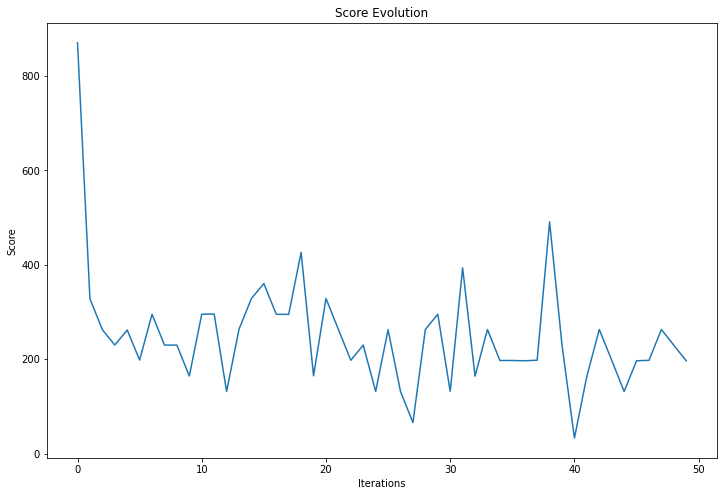

Best players for ['F', 'F-G', 'C', 'G', 'G-F', 'C-F', 'F-C']:
Rodions Kurucs:
	Rating: 75, Salary: 1699236
Wilson Chandler:
	Rating: 75, Salary: 2564753
Aron Baynes:
	Rating: 75, Salary: 5453280
Stephen Curry:
	Rating: 95, Salary: 40231758
Bojan Bogdanovic:
	Rating: 83, Salary: 17000000
Al Horford:
	Rating: 85, Salary: 28000000
Ivan Rabb:
	Rating: 74, Salary: 451326

Max Budget:  80000000


In [202]:
positions = ['F','F-G','C','G','G-F','C-F','F-C']
n_pop =50 
n = 50
elitism_size = 0.6
probability_crossover = 0.85
evolve(df,positions,80000000)